# Задание 1

### _Задача:_

Согласно варианта из прошлой лабораторной рассчитать локальные веса альтернатив по каждому из 
критериев и глобальные веса альтернатив для 
заданной иерархии с р=3 уровнями следующими методами синтеза:

- дистрибутивным;

- идеальным;

- мультипликативным;

- ГУБОПА с мультипликативным синтезом.

In [1]:
# импорт необходимых зависимостей
from core_methods import *

In [2]:
# построение мультипликативной МПС по критерию "надежность вложения денег"
reliability_criteria_matrix = np.array([
        [1, 1/3, 1, 3],
        [3, 1, 3, 7],
        [1, 1/3, 1, 4],
        [1/3, 1/7, 1/4, 1]
    ])

In [3]:
# построение мультипликативной МПС по критерию "прибыльность вложения денег"
profit_criteria_matrix = np.array([
        [1, 5, 3, 7],
        [1/5, 1, 1, 3],
        [1/3, 1, 1, 5],
        [1/7, 1/3, 1/5, 1]
    ])

In [4]:
# задание весов критериев (в данном случае критерии равнозначны)
criteria_weights = [0.5, 0.5]

In [5]:
# инициализация списка нормализованных локальных весов по заданным критериям
normalized_local_weights = []

In [6]:
# получение гармонического индекса согласованности и весов альтернатив по критерию "надежность вложения денег"
hci, normalized_weights = calculate_hci_and_weights(reliability_criteria_matrix)
print(f"reliability criteria matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)

reliability criteria matrix hci - 0.004555021518550066


In [7]:
# получение гармонического индекса согласованности и весов альтернатив по критерию "прибыльность вложения денег"
hci, normalized_weights = calculate_hci_and_weights(profit_criteria_matrix)
print(f"profit criteria matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)

profit criteria matrix hci - 0.020648967551622304


In [8]:
# приводим полученные локальные веса альтернатив по каждому из критериев к удобному для дальнейшей обработки виду
normalized_local_weights = np.transpose(np.array(normalized_local_weights))
normalized_local_weights

array([[0.1875    , 0.59659091],
       [0.55263158, 0.13636364],
       [0.19047619, 0.19230769],
       [0.06666667, 0.0625    ]])

#### Поиск глобальных весов альтернатив методом дистрибутивного синтеза:

In [9]:
global_weights_distributive = calculate_weights_by_distributive_synthesis(normalized_local_weights, criteria_weights)
global_weights_distributive

[0.3959973704028963,
 0.34609751276643125,
 0.1928435149253752,
 0.06506160190529725]

In [10]:
# проверка равенства единице суммы весов
np.sum(global_weights_distributive)

1.0

#### Поиск глобальных весов альтернатив методом идеального синтеза:

In [11]:
global_weights_ideal = calculate_weights_by_ideal_synthesis(normalized_local_weights, criteria_weights)
global_weights_ideal

array([0.4029577 , 0.33913519, 0.19290532, 0.06500179])

In [12]:
# проверка равенства единице суммы весов
np.sum(global_weights_ideal)

1.0

#### Поиск глобальных весов альтернатив методом мультипликативного синтеза:

In [13]:
global_weights_multiplicative = calculate_weights_by_multiplicative_synthesis(normalized_local_weights, criteria_weights)
global_weights_multiplicative

array([0.38669404, 0.31739177, 0.22128257, 0.07463163])

In [14]:
# проверка равенства единице суммы весов
np.sum(global_weights_multiplicative)

1.0

#### Поиск глобальных весов альтернатив методом ГУБОПА с мультипликативным синтезом:

In [15]:
# построение составной матрицы из МПС по заданным критериям
full_criteria_matrix = np.array([reliability_criteria_matrix, profit_criteria_matrix])
full_criteria_matrix

array([[[1.        , 0.33333333, 1.        , 3.        ],
        [3.        , 1.        , 3.        , 7.        ],
        [1.        , 0.33333333, 1.        , 4.        ],
        [0.33333333, 0.14285714, 0.25      , 1.        ]],

       [[1.        , 5.        , 3.        , 7.        ],
        [0.2       , 1.        , 1.        , 3.        ],
        [0.33333333, 1.        , 1.        , 5.        ],
        [0.14285714, 0.33333333, 0.2       , 1.        ]]])

In [16]:
# получение глобальных весов альтернатив
global_comparisons_weights = calculate_weights_by_gabrpa_synthesis(full_criteria_matrix, criteria_weights)
global_comparisons_weights

[0.4618606647387355,
 0.4202487519262801,
 0.10861079493183529,
 0.009279788403149037]

In [17]:
# проверка равенства единице суммы весов
np.sum(global_comparisons_weights)

1.0

# Задание 2

### _Задача:_

Добавить к рассмотрению еще одну альтернативу, построить новые МПС с учетом этой альтернативы по критериям, оценки относительно новой альтернативы должны быть построены в соответствии с фундаментальной шкалой Саати. Новые МПС по критериям должны быть согласованными. Добавить альтернативу со следующими свойствами:

- неоптимальную по обоим критериям;

- оптимальную по одному из критериев;

- эквивалентную альтернативе с наименьшим глобальным весом;

- эквивалентную оптимальной альтернативе.

Выполнить для расширенных МПС расчеты весов по методам, представленным выше, определить, имеет ли место реверс рангов вида "смена знака предпочтения между старыми альтернативами", "смена оптимальной альтернативы" или "смена рангов альтернатив при их попарном рассмотрении по сравнению с рассмотрением всех альтернатив одновременно".

### Добавление неоптимальной по обоим критериям альтернативы

In [18]:
# инициализация новых МПС
reliability_criteria_matrix = np.array([
        [1, 1/3, 1, 3, 4],
        [3, 1, 3, 7, 5],
        [1, 1/3, 1, 4, 5],
        [1/3, 1/7, 1/4, 1, 2],
        [1/4, 1/5, 1/5, 1/2, 1]
    ])
profit_criteria_matrix = np.array([
        [1, 5, 3, 7, 9],
        [1/5, 1, 1, 3, 5],
        [1/3, 1, 1, 5, 6],
        [1/7, 1/3, 1/5, 1, 2],
        [1/9, 1/5, 1/6, 1/2, 1]
    ])

In [19]:
# вычисление локальных весов альтернатив по критериям
normalized_local_weights = []
hci, normalized_weights = calculate_hci_and_weights(reliability_criteria_matrix)
print(f"reliability matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)
hci, normalized_weights = calculate_hci_and_weights(profit_criteria_matrix)
print(f"profit matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)
normalized_local_weights

reliability matrix hci - 0.02507109152344853
profit matrix hci - 0.02646003632403886


[array([0.17910448, 0.49763033, 0.18348624, 0.06451613, 0.05882353]),
 array([0.55950266, 0.13274336, 0.1863354 , 0.06060606, 0.04347826])]

In [20]:
# приведение полученных локальных весов альтернатив по каждому из критериев к удобному для дальнейшей обработки виду
normalized_local_weights = np.transpose(np.array(normalized_local_weights))
normalized_local_weights

array([[0.17910448, 0.55950266],
       [0.49763033, 0.13274336],
       [0.18348624, 0.1863354 ],
       [0.06451613, 0.06060606],
       [0.05882353, 0.04347826]])

In [21]:
# вычисление глобальных весов альтернатив методом дистрибутивного синтеза:
global_weights_distributive = calculate_weights_by_distributive_synthesis(normalized_local_weights, criteria_weights)
global_weights_distributive

[0.3757351728122378,
 0.32051635722422095,
 0.1880877017396074,
 0.06363480426609254,
 0.05202596395784141]

###### В данном случае реверс рангов не наблюдается, наихудшая новая альтернатива занимает 5-е место, остальные сохраняют порядок

_До добавления альтернативы:_
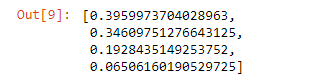

_После:_
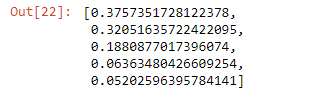

In [22]:
# вычисление глобальных весов альтернатив методом идеального синтеза:
global_weights_ideal = calculate_weights_by_ideal_synthesis(normalized_local_weights, criteria_weights)
global_weights_ideal

array([0.38698061, 0.30974746, 0.18817683, 0.063521  , 0.0515741 ])

###### В данном случае реверс рангов не наблюдается, наихудшая новая альтернатива занимает 5-е место, остальные сохраняют порядок

_До добавления альтернативы:_
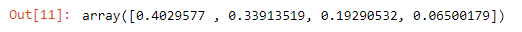

_После:_


In [23]:
# вычисление глобальных весов альтернатив методом мультипликативного синтеза:
global_weights_multiplicative = calculate_weights_by_multiplicative_synthesis(normalized_local_weights, criteria_weights)
global_weights_multiplicative

array([0.36319993, 0.29488405, 0.21214895, 0.07174368, 0.05802339])

###### В данном случае реверс рангов не наблюдается, наихудшая новая альтернатива занимает 5-е место, остальные сохраняют порядок

_До добавления альтернативы:_


_После:_


In [24]:
# вычисление глобальных весов альтернатив методом ГУБОПА с мультипликативным синтезом
full_criteria_matrix = np.array([reliability_criteria_matrix, profit_criteria_matrix])
global_comparisons_weights = calculate_weights_by_gabrpa_synthesis(full_criteria_matrix, criteria_weights)
global_comparisons_weights

[0.4734825847240596,
 0.4176190356295699,
 0.10138288122371555,
 0.005347249241609156,
 0.002168249181045785]

###### В данном случае реверс рангов не наблюдается, наихудшая новая альтернатива занимает 5-е место, остальные сохраняют порядок

_До добавления альтернативы:_
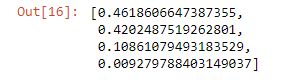

_После:_
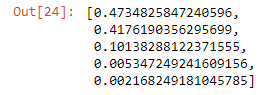

### Добавление альтернативы, оптимальной по одному критерию

In [25]:
# инициализация новых МПС
reliability_criteria_matrix = np.array([
        [1, 1/3, 1, 3, 1/5],
        [3, 1, 3, 7, 1/4],
        [1, 1/3, 1, 4, 1/6],
        [1/3, 1/7, 1/4, 1, 1/9],
        [5, 4, 6, 9, 1]
    ])
profit_criteria_matrix = np.array([
        [1, 5, 3, 7, 2],
        [1/5, 1, 1, 3, 3],
        [1/3, 1, 1, 5, 1/2],
        [1/7, 1/3, 1/5, 1, 1/3],
        [1/2, 1/3, 2, 3, 1]
    ])

In [26]:
# вычисление локальных весов альтернатив по критериям
normalized_local_weights = []
hci, normalized_weights = calculate_hci_and_weights(reliability_criteria_matrix)
print(f"reliability matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)
hci, normalized_weights = calculate_hci_and_weights(profit_criteria_matrix)
print(f"profit matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)
normalized_local_weights

reliability matrix hci - 0.03336756293987468
profit matrix hci - 0.11670105925254601


[array([0.09677419, 0.17213115, 0.08888889, 0.04166667, 0.57877814]),
 array([0.4595186 , 0.13043478, 0.13888889, 0.05263158, 0.14634146])]

In [27]:
# приведение полученных локальных весов альтернатив по каждому из критериев к удобному для дальнейшей обработки виду
normalized_local_weights = np.transpose(np.array(normalized_local_weights))
normalized_local_weights

array([[0.09677419, 0.4595186 ],
       [0.17213115, 0.13043478],
       [0.08888889, 0.13888889],
       [0.04166667, 0.05263158],
       [0.57877814, 0.14634146]])

In [28]:
# вычисление глобальных весов альтернатив методом дистрибутивного синтеза:
global_weights_distributive = calculate_weights_by_distributive_synthesis(normalized_local_weights, criteria_weights)
global_weights_distributive

[0.29709820532516046,
 0.15827145647260527,
 0.12028038423768822,
 0.0496599481856131,
 0.374690005778933]

###### В данном случае наблюдается реверс рангов - новая альтернатива стала оптимальной, остальные сохранили свой порядок относительно своих старых приоритетов и главенства новой альтернативы, имеет место реверс рангов типа 1 - "изменение оптимальной альтернативы"

_До добавления альтернативы:_
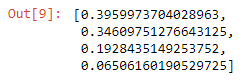

_После:_
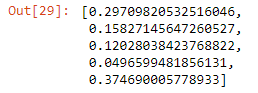

In [29]:
# вычисление глобальных весов альтернатив методом идеального синтеза:
global_weights_ideal = calculate_weights_by_ideal_synthesis(normalized_local_weights, criteria_weights)
global_weights_ideal

array([0.38305406, 0.15059904, 0.13303864, 0.05272497, 0.28058329])

###### В данном случае наблюдается реверс рангов - новая альтернатива стала 2-й по оптимальности, старая оптимальная сохранила свое превосходство, имеет место реверс рангов типа 2 - "изменение порядка ранжирования старых альтернатив"

_До добавления альтернативы:_


_После:_


In [30]:
# вычисление глобальных весов альтернатив методом мультипликативного синтеза:
global_weights_multiplicative = calculate_weights_by_multiplicative_synthesis(normalized_local_weights, criteria_weights)
global_weights_multiplicative

array([0.26044314, 0.18505807, 0.13722685, 0.05783612, 0.35943582])

###### В данном случае наблюдается реверс рангов - новая альтернатива стала оптимальной, остальные сохранили свой порядок относительно своих старых приоритетов и главенства новой альтернативы, имеет место реверс рангов типа 1 - "изменение оптимальной альтернативы"

_До добавления альтернативы:_


_После:_


In [31]:
# вычисление глобальных весов альтернатив методом ГУБОПА с мультипликативным синтезом
full_criteria_matrix = np.array([reliability_criteria_matrix, profit_criteria_matrix])
global_comparisons_weights = calculate_weights_by_gabrpa_synthesis(full_criteria_matrix, criteria_weights)
global_comparisons_weights

[0.4129276703017089,
 0.09019498371829379,
 0.031876886742869454,
 0.002063733347890201,
 0.46293672588923757]

###### В данном случае наблюдается реверс рангов - новая альтернатива стала оптимальной, остальные сохранили свой порядок относительно своих старых приоритетов и главенства новой альтернативы, имеет место реверс рангов типа 1 - "изменение оптимальной альтернативы". Также имеет место реверс рангов типа 3 - "смена рангов альтернатив при их попарном рассмотрении по сравнению с рассмотрением всех альтернатив одновременно", поскольку был использован метод поиска весов, основанный на парных сравнениях

_До добавления альтернативы:_
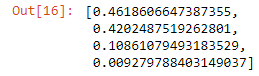

_После:_
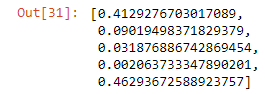

### Добавление альтернативы, эквивалентной альтернативе с наименьшим глобальным весом

In [32]:
# инициализация новых МПС
reliability_criteria_matrix = np.array([
        [1, 1/3, 1, 3, 3],
        [3, 1, 3, 7, 7],
        [1, 1/3, 1, 4, 4],
        [1/3, 1/7, 1/4, 1, 1],
        [1/3, 1/7, 1/4, 1, 1]
    ])
profit_criteria_matrix = np.array([
        [1, 5, 3, 7, 7],
        [1/5, 1, 1, 3, 3],
        [1/3, 1, 1, 5, 5],
        [1/7, 1/3, 1/5, 1, 1],
        [1/7, 1/3, 1/5, 1, 1]
    ])

In [33]:
# вычисление локальных весов альтернатив по критериям
normalized_local_weights = []
hci, normalized_weights = calculate_hci_and_weights(reliability_criteria_matrix)
print(f"reliability matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)
hci, normalized_weights = calculate_hci_and_weights(profit_criteria_matrix)
print(f"profit matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)
normalized_local_weights

reliability matrix hci - 0.006804893627475028
profit matrix hci - 0.025932852669289463


[array([0.17647059, 0.51219512, 0.18181818, 0.0625    , 0.0625    ]),
 array([0.54973822, 0.13043478, 0.18518519, 0.05882353, 0.05882353])]

In [34]:
# приведение полученных локальных весов альтернатив по каждому из критериев к удобному для дальнейшей обработки виду
normalized_local_weights = np.transpose(np.array(normalized_local_weights))
normalized_local_weights

array([[0.17647059, 0.54973822],
       [0.51219512, 0.13043478],
       [0.18181818, 0.18518519],
       [0.0625    , 0.05882353],
       [0.0625    , 0.05882353]])

In [35]:
# вычисление глобальных весов альтернатив методом дистрибутивного синтеза:
global_weights_distributive = calculate_weights_by_distributive_synthesis(normalized_local_weights, criteria_weights)
global_weights_distributive

[0.36825678534680484,
 0.3236042787205349,
 0.18551489467193555,
 0.06131202063036238,
 0.06131202063036238]

###### В данном случае реверс рангов не наблюдается, новая альтернатива делит 4-5-е места с наихудшей, поскольку эквивалентна ей, остальные сохраняют порядок

_До добавления альтернативы:_
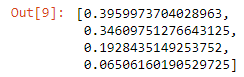

_После:_
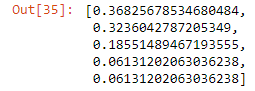

In [36]:
# вычисление глобальных весов альтернатив методом идеального синтеза:
global_weights_ideal = calculate_weights_by_ideal_synthesis(normalized_local_weights, criteria_weights)
global_weights_ideal

array([0.37380546, 0.31805767, 0.18559833, 0.06126927, 0.06126927])

###### В данном случае реверс рангов не наблюдается, новая альтернатива делит 4-5-е места с наихудшей, поскольку эквивалентна ей, остальные сохраняют порядок

_До добавления альтернативы:_


_После:_


In [37]:
# вычисление глобальных весов альтернатив методом мультипликативного синтеза:
global_weights_multiplicative = calculate_weights_by_multiplicative_synthesis(normalized_local_weights, criteria_weights)
global_weights_multiplicative

array([0.35608494, 0.29549756, 0.20977863, 0.06931944, 0.06931944])

###### В данном случае реверс рангов не наблюдается, новая альтернатива делит 4-5-е места с наихудшей, поскольку эквивалентна ей, остальные сохраняют порядок

_До добавления альтернативы:_


_После:_


In [38]:
# вычисление глобальных весов альтернатив методом ГУБОПА с мультипликативным синтезом
full_criteria_matrix = np.array([reliability_criteria_matrix, profit_criteria_matrix])
global_comparisons_weights = calculate_weights_by_gabrpa_synthesis(full_criteria_matrix, criteria_weights)
global_comparisons_weights

[0.46414619475416463,
 0.4369550107836046,
 0.0914845919296153,
 0.0037071012663077076,
 0.0037071012663077076]

###### В данном случае реверс рангов не наблюдается, новая альтернатива делит 4-5-е места с наихудшей, поскольку эквивалентна ей, остальные сохраняют порядок

_До добавления альтернативы:_
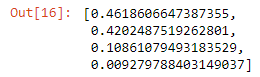

_После:_
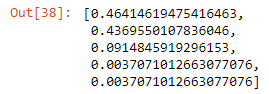

### Добавление альтернативы, эквивалентной альтернативе с наибольшим глобальным весом

In [39]:
# инициализация новых МПС
reliability_criteria_matrix = np.array([
        [1, 1/3, 1, 3, 1],
        [3, 1, 3, 7, 3],
        [1, 1/3, 1, 4, 1],
        [1/3, 1/7, 1/4, 1, 1/3],
        [1, 1/3, 1, 3, 1]
    ])
profit_criteria_matrix = np.array([
        [1, 5, 3, 7, 1],
        [1/5, 1, 1, 3, 1/5],
        [1/3, 1, 1, 5, 1/3],
        [1/7, 1/3, 1/5, 1, 1/7],
        [1, 5, 3, 7, 1]
    ])

In [40]:
# вычисление локальных весов альтернатив по критериям
normalized_local_weights = []
hci, normalized_weights = calculate_hci_and_weights(reliability_criteria_matrix)
print(f"reliability matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)
hci, normalized_weights = calculate_hci_and_weights(profit_criteria_matrix)
print(f"profit matrix hci - {hci}")
normalized_local_weights.append(normalized_weights)
normalized_local_weights

reliability matrix hci - 0.002988397984296043
profit matrix hci - 0.009294959324161845


[array([0.15789474, 0.46666667, 0.16      , 0.05555556, 0.15789474]),
 array([0.37366548, 0.08108108, 0.12195122, 0.04347826, 0.37366548])]

In [41]:
# приведение полученных локальных весов альтернатив по каждому из критериев к удобному для дальнейшей обработки виду
normalized_local_weights = np.transpose(np.array(normalized_local_weights))
normalized_local_weights

array([[0.15789474, 0.37366548],
       [0.46666667, 0.08108108],
       [0.16      , 0.12195122],
       [0.05555556, 0.04347826],
       [0.15789474, 0.37366548]])

In [42]:
# вычисление глобальных весов альтернатив методом дистрибутивного синтеза:
global_weights_distributive = calculate_weights_by_distributive_synthesis(normalized_local_weights, criteria_weights)
global_weights_distributive

[0.26709512788615003,
 0.2745899508994114,
 0.14151283485689262,
 0.049706958471395904,
 0.26709512788615003]

###### В данном случае наблюдается реверс рангов - ранее занимающее 2-е место альтернатива стала оптимальной, ранее 1-я стала делить 2-3-е места с новой, поскольку эти альтернативы эквивалентны, остальные сохранили свой порядок относительно своих старых приоритетов, имеет место реверс рангов типа 1 - "изменение оптимальной альтернативы"

_До добавления альтернативы:_
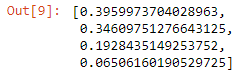

_После:_
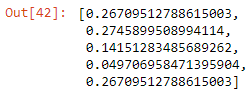

In [43]:
# вычисление глобальных весов альтернатив методом идеального синтеза:
global_weights_ideal = calculate_weights_by_ideal_synthesis(normalized_local_weights, criteria_weights)
global_weights_ideal

array([0.2548194 , 0.29634939, 0.143633  , 0.0503788 , 0.2548194 ])

###### В данном случае наблюдается реверс рангов - ранее занимающее 2-е место альтернатива стала оптимальной, ранее 1-я стала делить 2-3-е места с новой, поскольку эти альтернативы эквивалентны, остальные сохранили свой порядок относительно своих старых приоритетов, имеет место реверс рангов типа 1 - "изменение оптимальной альтернативы"

_До добавления альтернативы:_


_После:_


In [44]:
# вычисление глобальных весов альтернатив методом мультипликативного синтеза:
global_weights_multiplicative = calculate_weights_by_multiplicative_synthesis(normalized_local_weights, criteria_weights)
global_weights_multiplicative

array([0.2794669 , 0.22380419, 0.16071563, 0.05654639, 0.2794669 ])

###### В данном случае реверс рангов не наблюдается, новая альтернатива делит 1-2-е места с оптимальной, поскольку эквивалентна ей, остальные сохраняют порядок

_До добавления альтернативы:_


_После:_


In [45]:
# вычисление глобальных весов альтернатив методом ГУБОПА с мультипликативным синтезом
full_criteria_matrix = np.array([reliability_criteria_matrix, profit_criteria_matrix])
global_comparisons_weights = calculate_weights_by_gabrpa_synthesis(full_criteria_matrix, criteria_weights)
global_comparisons_weights

[0.2664222375567655,
 0.4131794250167307,
 0.05126661487964945,
 0.002709484990088905,
 0.2664222375567655]

###### В данном случае наблюдается реверс рангов - ранее занимающее 2-е место альтернатива стала оптимальной, ранее 1-я стала делить 2-3-е места с новой, поскольку эти альтернативы эквивалентны, остальные сохранили свой порядок относительно своих старых приоритетов, имеет место реверс рангов типа 1 - "изменение оптимальной альтернативы". Также имеет место реверс рангов типа 3 - "смена рангов альтернатив при их попарном рассмотрении по сравнению с рассмотрением всех альтернатив одновременно", поскольку был использован метод поиска весов, основанный на парных сравнениях

_До добавления альтернативы:_
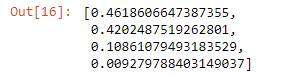

_После:_
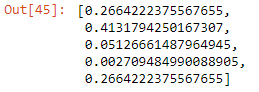